In [120]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

#Algorithms 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

In [121]:
df=pd.read_csv("Covid.csv")
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-01 02:32:32,32.3182,-86.9023,7187,272,0.0,6816.0,1,151.165615,87196.0,978.0,3.837472,84000001,USA,1859.627115,13.797968
1,Alaska,US,2020-05-01 02:32:32,61.3707,-152.4044,355,9,252.0,94.0,2,59.389476,19119.0,NaN,2.535211,84000002,USA,3198.499705,NaN
2,American Samoa,US,2020-05-01 02:32:32,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-05-01 02:32:32,33.7298,-111.4312,7655,320,1499.0,5836.0,4,105.169634,71786.0,1169.0,4.180274,84000004,USA,986.245241,15.271065
4,Arkansas,US,2020-05-01 02:32:32,34.9697,-92.3731,3281,61,1305.0,1915.0,5,126.727145,48379.0,402.0,1.859189,84000005,USA,1868.617052,12.252362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,Virginia,US,2020-05-20 02:32:25,37.7693,-78.1700,32145,1042,4271.0,26832.0,51,376.602758,202789.0,5768.0,3.241562,84000051,USA,2375.825067,17.943693
1156,Washington,US,2020-05-20 02:32:25,47.4009,-121.4905,18811,1048,NaN,17780.0,53,247.029078,289135.0,NaN,5.480836,84000053,USA,3796.967338,NaN
1157,West Virginia,US,2020-05-20 02:32:25,38.4912,-80.9545,1502,68,922.0,512.0,54,83.810089,78301.0,NaN,4.527297,84000054,USA,4369.117042,NaN
1158,Wisconsin,US,2020-05-20 02:32:25,44.2685,-89.6165,12885,467,7371.0,5047.0,55,221.299202,161122.0,2110.0,3.624369,84000055,USA,2767.261939,16.375631


In [122]:
for col in ["Province_State","FIPS","ISO3"]:
    print("No of Unique values in "+col,len(df[col].unique()))
    print("Column Name "+col,df[col].unique(),end='\n\n\n')
    

No of Unique values in Province_State 58
Column Name Province_State ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


No of Unique values in FIPS 58
Column Name FIPS [    1     2    60     4     5     6     8     9    10 88888    11    12
    13 99999    66    15    16    17    18    19    20    21    22    23
    24    2

In [123]:
df.Last_Update = pd.to_datetime(df.Last_Update).dt.date

In [124]:
#This data Set contains data of 58- Regions in US as from 2020-05-01 to 2020-05-20 02:32:54

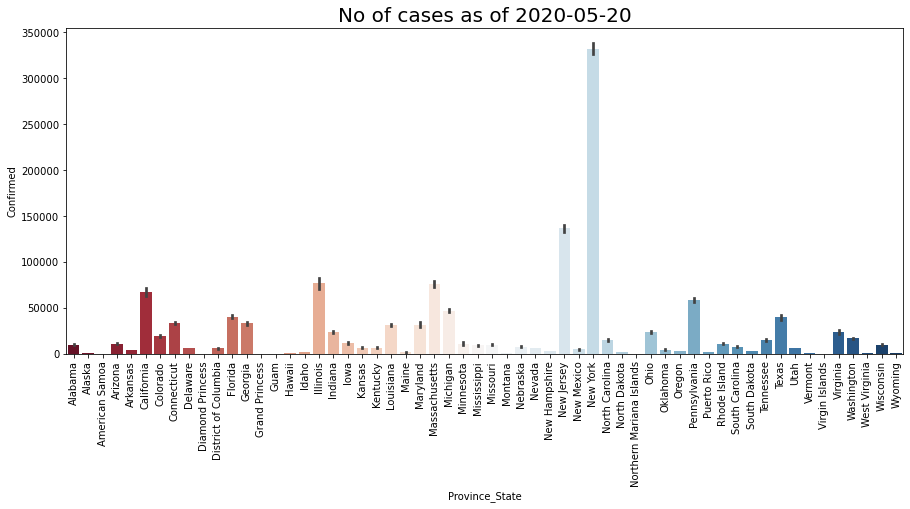

In [125]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Province_State', y = 'Confirmed', data = df, palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('No of cases as of 2020-05-20', fontsize = 20)
plt.show()

In [126]:
#New York and New Jersey have the highest number of cases Recoreded 

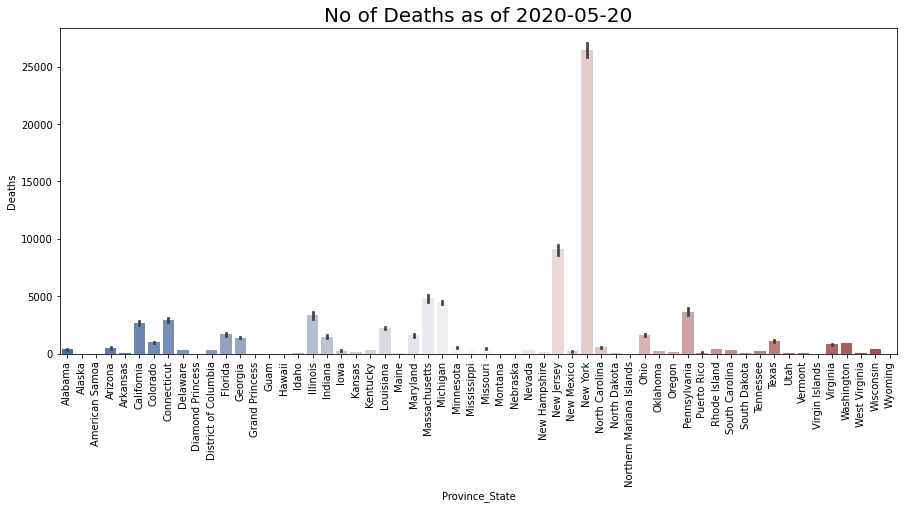

In [127]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Province_State', y = 'Deaths', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('No of Deaths as of 2020-05-20', fontsize = 20)
plt.show()

In [128]:
date_grp = df.groupby(['Last_Update'])

In [129]:
print("Total No of Confirmed cases as of 2020-05-20 in US:",date_grp.get_group("2020-05-20")["Confirmed"].sum())
print("Total No of Recovered Cases as of 2020-05-20 in US:",date_grp.get_group("2020-05-20")["Recovered"].sum())
print("Total No of Deadths as of 2020-05-20 in US:",date_grp.get_group("2020-05-20")["Deaths"].sum())
print("Total No of Active as of 2020-05-20 in US:",date_grp.get_group("2020-05-20")["Active"].sum())

Total No of Confirmed cases as of 2020-05-20 in US: 1530271
Total No of Recovered Cases as of 2020-05-20 in US: 289392.0
Total No of Deadths as of 2020-05-20 in US: 92450
Total No of Active as of 2020-05-20 in US: 1147255.0


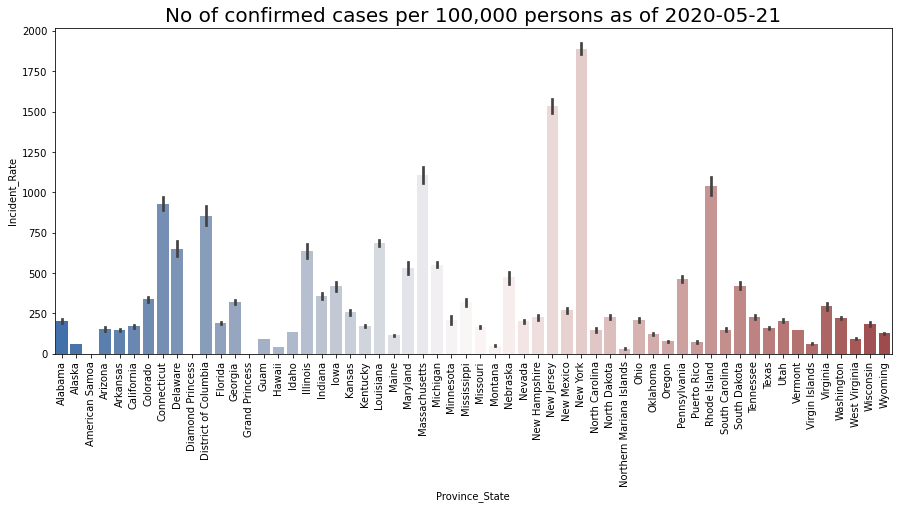

In [130]:

plt.figure(figsize=(15,6))
sns.barplot(x = 'Province_State', y = 'Incident_Rate', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('No of confirmed cases per 100,000 persons as of 2020-05-21', fontsize = 20)
plt.show()

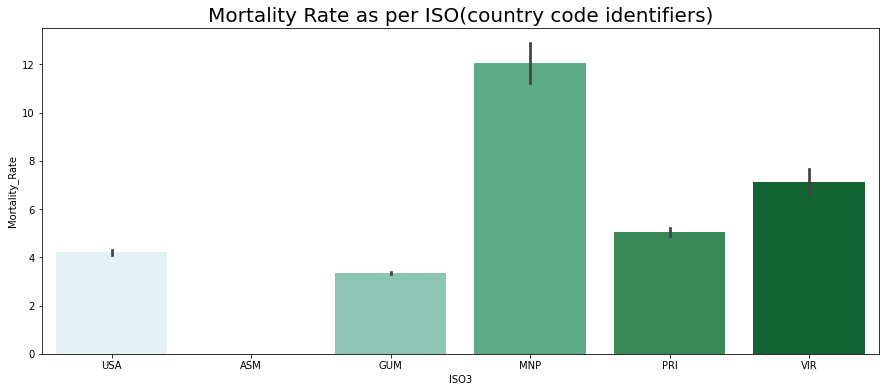

In [131]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'ISO3', y = 'Mortality_Rate', data = df, palette = 'BuGn')
plt.xticks(rotation = 0)
plt.title('Mortality Rate as per ISO(country code identifiers)', fontsize = 20)
plt.show()

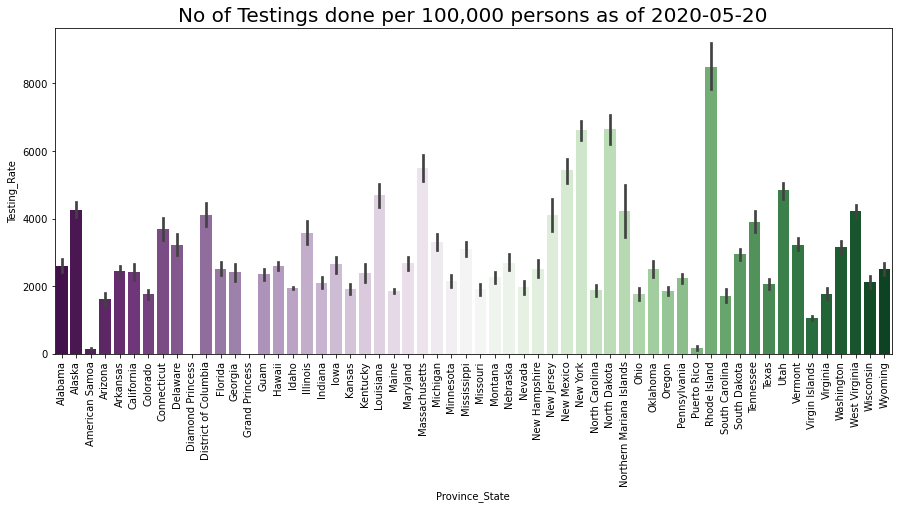

In [132]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Province_State', y = 'Testing_Rate', data = df, palette = 'PRGn')
plt.xticks(rotation = 90)
plt.title('No of Testings done per 100,000 persons as of 2020-05-20', fontsize = 20)
plt.show()

In [133]:
# Rhode Island is thinly populated area so the test ratio is high compared with other places 

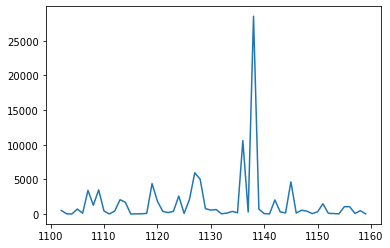

In [134]:
date_grp.get_group("2020-05-20")["Deaths"].plot()

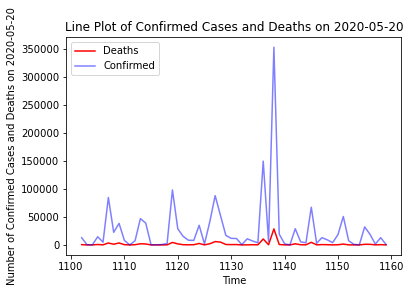

In [135]:
date_grp.get_group("2020-05-20")["Deaths"].plot(kind="line",color="red",label="Deaths",grid=True,alpha=1)#alpha= to set opacity. rest defines itself
date_grp.get_group("2020-05-20")["Confirmed"].plot(color="blue",label="Confirmed",alpha=0.5)
plt.legend(loc="upper left")#to put label on the plot. loc=location
plt.xlabel("Time")#to label x axis
plt.ylabel("Number of Confirmed Cases and Deaths on 2020-05-20")
plt.title("Line Plot of Confirmed Cases and Deaths on 2020-05-20")
plt.show()

In [136]:
country_grp = df.groupby(['Province_State'])
country_grp.get_group("American Samoa")


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2020-05-01,-14.271,-170.132,0,0,0.0,0.0,60,0.0,3.0,NaN,NaN,16,ASM,5.391708,NaN
60,American Samoa,US,2020-05-02,-14.271,-170.132,0,0,0.0,0.0,60,0.0,57.0,NaN,NaN,16,ASM,102.442444,NaN
118,American Samoa,US,2020-05-03,-14.271,-170.132,0,0,0.0,0.0,60,0.0,57.0,NaN,NaN,16,ASM,102.442444,NaN
176,American Samoa,US,2020-05-04,-14.271,-170.132,0,0,0.0,0.0,60,0.0,57.0,NaN,NaN,16,ASM,102.442444,NaN
234,American Samoa,US,2020-05-05,-14.271,-170.132,0,0,0.0,0.0,60,0.0,83.0,NaN,NaN,16,ASM,149.170576,NaN
292,American Samoa,US,2020-05-06,-14.271,-170.132,0,0,NaN,0.0,60,0.0,83.0,NaN,NaN,16,ASM,149.170576,NaN
350,American Samoa,US,2020-05-07,-14.271,-170.132,0,0,NaN,0.0,60,0.0,83.0,NaN,NaN,16,ASM,149.170576,NaN
408,American Samoa,US,2020-05-08,-14.271,-170.132,0,0,NaN,0.0,60,0.0,83.0,NaN,NaN,16,ASM,149.170576,NaN
466,American Samoa,US,2020-05-09,-14.271,-170.132,0,0,NaN,0.0,60,0.0,83.0,NaN,NaN,16,ASM,149.170576,NaN
524,American Samoa,US,2020-05-10,-14.271,-170.132,0,0,NaN,0.0,60,0.0,83.0,NaN,NaN,16,ASM,149.170576,NaN


In [137]:
country_grp.get_group("Grand Princess")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
13,Grand Princess,US,2020-05-01,NaN,NaN,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
71,Grand Princess,US,2020-05-02,NaN,NaN,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
129,Grand Princess,US,2020-05-03,NaN,NaN,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
187,Grand Princess,US,2020-05-04,NaN,NaN,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
245,Grand Princess,US,2020-05-05,NaN,NaN,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
303,Grand Princess,US,2020-05-06,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
361,Grand Princess,US,2020-05-07,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
419,Grand Princess,US,2020-05-08,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
477,Grand Princess,US,2020-05-09,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
535,Grand Princess,US,2020-05-10,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


There has been no proper activity registed in the following regions so they can be dropped 

In [138]:
df.drop(df[df['Province_State'] == "American Samoa"].index, inplace = True)


In [139]:
df.drop(df[df['Province_State'] == "Grand Princess"].index, inplace = True)

In [140]:
#Data cleaning and feature engineering 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1159
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        1120 non-null   object 
 1   Country_Region        1120 non-null   object 
 2   Last_Update           1120 non-null   object 
 3   Lat                   1100 non-null   float64
 4   Long_                 1100 non-null   float64
 5   Confirmed             1120 non-null   int64  
 6   Deaths                1120 non-null   int64  
 7   Recovered             902 non-null    float64
 8   Active                1120 non-null   float64
 9   FIPS                  1120 non-null   int64  
 10  Incident_Rate         1100 non-null   float64
 11  People_Tested         1100 non-null   float64
 12  People_Hospitalized   651 non-null    float64
 13  Mortality_Rate        1120 non-null   float64
 14  UID                   1120 non-null   int64  
 15  ISO3                 

In [141]:
#we are droping Country_Region as there are no Unique values
df.drop("Country_Region",axis=1,inplace=True)

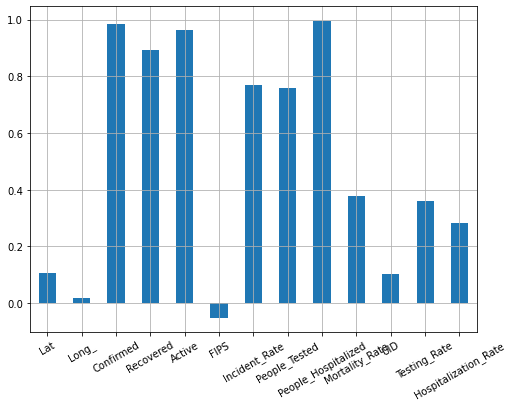

In [142]:
plt.figure(figsize=(8,6))
df.drop("Deaths",axis=1).corrwith(df["Deaths"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

In [143]:
#There is high correlation between many columns where Lat, Long_ does and UID  not have much significance 
#we can go ahead and drop the same 
df.drop(["Lat","Long_","UID"],axis=1,inplace=True)

In [144]:
df.drop(["FIPS"],axis=1,inplace=True)

In [145]:
#let us replace the Nan Values with Zero 
df["People_Hospitalized"].fillna(0,inplace=True)
df["Recovered"].fillna(0,inplace=True)
df["Hospitalization_Rate"].fillna(0,inplace=True)
df["Incident_Rate"].fillna(0,inplace=True)
df["People_Tested"].fillna(0,inplace=True)
df["Testing_Rate"].fillna(0,inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1159
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        1120 non-null   object 
 1   Last_Update           1120 non-null   object 
 2   Confirmed             1120 non-null   int64  
 3   Deaths                1120 non-null   int64  
 4   Recovered             1120 non-null   float64
 5   Active                1120 non-null   float64
 6   Incident_Rate         1120 non-null   float64
 7   People_Tested         1120 non-null   float64
 8   People_Hospitalized   1120 non-null   float64
 9   Mortality_Rate        1120 non-null   float64
 10  ISO3                  1120 non-null   object 
 11  Testing_Rate          1120 non-null   float64
 12  Hospitalization_Rate  1120 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 122.5+ KB


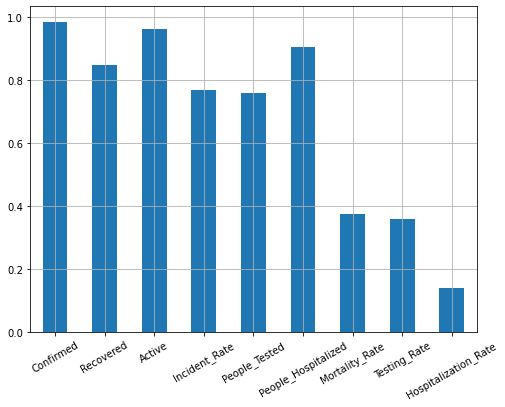

In [147]:
#Let us once again check the Correlation of the data with deaths after the data cleaning 
plt.figure(figsize=(8,6))
df.drop("Deaths",axis=1).corrwith(df["Deaths"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

In [148]:
#let us Encode the ISO3 and Province_State and Last_Update using label Encoder

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["ISO3","Province_State","Last_Update"]] = df[["ISO3","Province_State","Last_Update"]].apply(le.fit_transform)
df

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,7187,272,0.0,6816.0,151.165615,87196.0,978.0,3.837472,3,1859.627115,13.797968
1,1,0,355,9,252.0,94.0,59.389476,19119.0,0.0,2.535211,3,3198.499705,0.000000
3,2,0,7655,320,1499.0,5836.0,105.169634,71786.0,1169.0,4.180274,3,986.245241,15.271065
4,3,0,3281,61,1305.0,1915.0,126.727145,48379.0,402.0,1.859189,3,1868.617052,12.252362
5,4,0,50712,2031,0.0,48099.0,127.854538,625337.0,0.0,4.051466,3,1594.896734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,51,19,32145,1042,4271.0,26832.0,376.602758,202789.0,5768.0,3.241562,3,2375.825067,17.943693
1156,52,19,18811,1048,0.0,17780.0,247.029078,289135.0,0.0,5.480836,3,3796.967338,0.000000
1157,53,19,1502,68,922.0,512.0,83.810089,78301.0,0.0,4.527297,3,4369.117042,0.000000
1158,54,19,12885,467,7371.0,5047.0,221.299202,161122.0,2110.0,3.624369,3,2767.261939,16.375631


In [150]:
#let us go ahead with model building 

In [151]:
y=df["Deaths"]
x=df.drop("Deaths", axis=1)
print("\n X Shape", x.shape, "Y Shape",y.shape)


 X Shape (1120, 12) Y Shape (1120,)


In [152]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [153]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
    if r2_score(y_train,pred_train)*100>max_scr:    
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 30 The model Perfomes very well
Training r2_score is: 99.96155793481171
Testing r2_score is: 99.9489933535254
At random state 31 The model Perfomes very well
Training r2_score is: 99.95903491324651
Testing r2_score is: 99.96282676087728
At random state 32 The model Perfomes very well
Training r2_score is: 99.96511116142793
Testing r2_score is: 99.93690771839827
At random state 33 The model Perfomes very well
Training r2_score is: 99.96133007951052
Testing r2_score is: 99.95323702000786
At random state 34 The model Perfomes very well
Training r2_score is: 99.96057147543034
Testing r2_score is: 99.95589023874632
At random state 35 The model Perfomes very well
Training r2_score is: 99.95416282773401
Testing r2_score is: 99.97194610506082
At random state 36 The model Perfomes very well
Training r2_score is: 99.96154186419317
Testing r2_score is: 99.95041086587437
At random state 37 The model Perfomes very well
Training r2_score is: 99.95698328742708
Testing r2_score is: 99.

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=40)
num_folds = 10
seed = 40
scoring = 'neg_mean_squared_error'

In [155]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(1)),
    ("SVR",SVR()),
    ("RandomForestRegressor",RandomForestRegressor())
    ]

In [156]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2*100)
    print(msg)

R2 Score with Lasso: 99.254590 
R2 Score with Linear Regression: 99.970408 
R2 Score with Decision Tree: 99.918993 
R2 Score with Ridge Regression: 99.202774 
R2 Score with KNearest Neighbors: 99.945395 
R2 Score with SVR: -9.301479 
R2 Score with RandomForestRegressor: 99.964731 


In [157]:
#Randomforest has Perfomed the best the us go ahead with hyper parameter tuning 

In [158]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()

n_estimators= [10,12]
max_features= [5, 10], 
max_depth= [10, None] 
bootstrap = [True, False]
criterion= ["mse", "mae"]
    
grid = dict(n_estimators=n_estimators,max_depth=max_depth, criterion=criterion)  

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_depth': None, 'n_estimators': 10}


In [159]:
rf = RandomForestRegressor(criterion= 'mae', max_depth = 10, n_estimators= 10)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_predrf = rf.predict(x_test)

rfs = r2_score(y_test,y_predrf)
print("r2 score is :",rfs*100)

rfscore=cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print("Cross value Score:",rfc*100)

r2 score is : 99.94059751535372
Cross value Score: 99.29899201686823


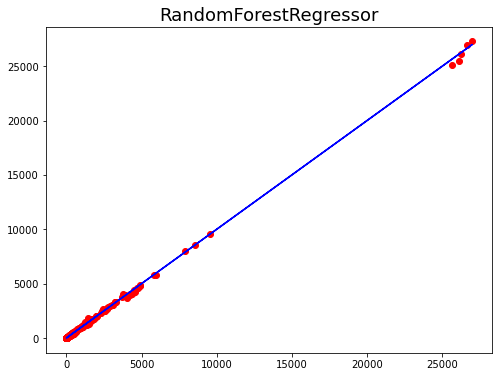

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("RandomForestRegressor",fontsize=18)
plt.show()

In [161]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":y_predrf})
df_pred

,Original,Predicted
138,1993,1981.10
675,575,662.70
860,287,281.15
142,4021,3801.75
441,172,180.40
...,...,...
853,284,277.90
1085,288,283.80
660,2308,2318.05
921,53,53.30


In [162]:
import joblib
joblib.dump(rf,"RFCovidDeathpred.pkl")

['RFCovidDeathpred.pkl']